# Correlaciones del Dataset <i>Rain In Australia</i>

Authors: Jorge Martín Villafruela, Elisa Batista Blanco

In [75]:

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Cargamos el dataset

In [76]:

df = pd.read_csv('weatherAUS.csv')

## Matriz de correlación

In [79]:
def yes_no_to_int(x:str):
    if (x=="Yes"):
        return 1
    else:
        return 0
    
# Trasformamos booleanas en numericas


df["RainTodayNum"]= df["RainToday"].map(yes_no_to_int)
df["RainTomorrowNum"]= df["RainTomorrow"].map(yes_no_to_int)


num_atrib= ["RainTomorrowNum","RainTodayNum",
                "MinTemp","MaxTemp","Temp9am","Temp3pm",
                "Rainfall","Evaporation","Sunshine",
                "WindGustSpeed","WindSpeed9am","WindSpeed3pm",
                "Humidity9am", "Humidity3pm",
                "Pressure9am","Pressure3pm",
                "Cloud9am","Cloud3pm"]

df_num = df[num_atrib]

Trasformación de la variables sobre las direcciones de viento en numérico

In [80]:



def direction_to_int(x:str):
    if (not pd.isna(x)):
        valores =["N","NNE","NE","ENE",
                  "E","ESE","SE","SSE",
                  "S","SSW","SW","WSW",
                  "W","WNW","NW","NNW"] # Se requiere que esté en este orden 
        coordenadas= (np.sin(2*np.pi*valores.index(x)/16),np.cos(2*np.pi*valores.index(x)/16) )
    else:
        coordenadas = (0,0)
    return coordenadas

In [84]:

# Transformamos los atributos sobre la direccion del viento en numéricos
df_num[["WindGustDirNum1","WindGustDirNum2"]] = df["WindGustDir"].apply(direction_to_int).apply(pd.Series)
df_num[["WindDir9amNum1","WindDir9amNum2"]] = df["WindDir9am"].apply(direction_to_int).apply(pd.Series)
df_num[["WindDir3pmNum1","WindDir3pmNum2"]] = df["WindDir3pm"].apply(direction_to_int).apply(pd.Series)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\115442920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[["WindGustDirNum1","WindGustDirNum2"]] = df["WindGustDir"].apply(direction_to_int).apply(pd.Series)
C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\115442920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[["WindGustDirNum1","WindGustDirNum2"]] = df["WindGustDir"].apply(direction_to_int).apply(pd.Series)
C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\115442920.py:3: SettingWith

In [85]:
df_num

RainTomorrowNum  RainTodayNum  MinTemp  MaxTemp  Temp9am  Temp3pm  \
0                     0             0     13.4     22.9     16.9     21.8   
1                     0             0      7.4     25.1     17.2     24.3   
2                     0             0     12.9     25.7     21.0     23.2   
3                     0             0      9.2     28.0     18.1     26.5   
4                     0             0     17.5     32.3     17.8     29.7   
...                 ...           ...      ...      ...      ...      ...   
145455                0             0      2.8     23.4     10.1     22.4   
145456                0             0      3.6     25.3     10.9     24.5   
145457                0             0      5.4     26.9     12.5     26.1   
145458                0             0      7.8     27.0     15.1     26.0   
145459                0             0     14.9      NaN     15.0     20.9   

        Rainfall  Evaporation  Sunshine  WindGustSpeed  ...  Pressure9am  \
0            0.6          NaN       NaN           44.0  ...       1007.7   
1            0.0          NaN       NaN           44.0  ...       1010.6   
2            0.0          NaN       NaN           46.0  ...       1007.6   
3            0.0          NaN       NaN           24.0  ...       1017.6   
4            1.0          NaN       NaN           41.0  ...       1010.8   
...          ...          ...       ...            ...  ...          ...   
145455       0.0          NaN       NaN           31.0  ...       1024.6   
145456       0.0          NaN       NaN           22.0  ...       1023.5   
145457       0.0          NaN       NaN           37.0  ...       1021.0   
145458       0.0          NaN       NaN           28.0  ...       1019.4   
145459       0.0          NaN       NaN            NaN  ...       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  WindGustDirNum1  WindGustDirNum2  \
0            1007.1       8.0       NaN        -1.000000    -1.836970e-16   
1            1007.8       NaN       NaN        -0.923880     3.826834e-01   
2            1008.7       NaN       2.0        -0.923880    -3.826834e-01   
3            1012.8       NaN       NaN         0.707107     7.071068e-01   
4            1006.0       7.0       8.0        -1.000000    -1.836970e-16   
...             ...       ...       ...              ...              ...   
145455       1020.3       NaN       NaN         1.000000     6.123234e-17   
145456       1019.1       NaN       NaN        -0.382683     9.238795e-01   
145457       1016.8       NaN       NaN         0.000000     1.000000e+00   
145458       1016.5       3.0       2.0         0.707107    -7.071068e-01   
145459       1017.9       8.0       8.0         0.000000     0.000000e+00   

        WindDir9amNum1  WindDir9amNum2  WindDir3pmNum1  WindDir3pmNum2  
0            -1.000000   -1.836970e-16       -0.923880    3.826834e-01  
1            -0.382683    9.238795e-01       -0.923880   -3.826834e-01  
2            -1.000000   -1.836970e-16       -0.923880   -3.826834e-01  
3             0.707107   -7.071068e-01        1.000000    6.123234e-17  
4             0.923880    3.826834e-01       -0.707107    7.071068e-01  
...                ...             ...             ...             ...  
145455        0.707107   -7.071068e-01        0.923880    3.826834e-01  
145456        0.707107   -7.071068e-01        0.000000    1.000000e+00  
145457        0.707107   -7.071068e-01       -0.923880    3.826834e-01  
145458        0.382683   -9.238795e-01        0.000000    1.000000e+00  
145459        0.923880   -3.826834e-01        0.923880   -3.826834e-01  

[145460 rows x 24 columns]

Matriz de correlación:

In [87]:
df_num.corr()

RainTomorrowNum  RainTodayNum   MinTemp   MaxTemp   Temp9am  \
RainTomorrowNum         1.000000      0.305744  0.082455 -0.157141 -0.025685   
RainTodayNum            0.305744      1.000000  0.054702 -0.226001 -0.096357   
MinTemp                 0.082455      0.054702  1.000000  0.736555  0.901821   
MaxTemp                -0.157141     -0.226001  0.736555  1.000000  0.887210   
Temp9am                -0.025685     -0.096357  0.901821  0.887210  1.000000   
Temp3pm                -0.190073     -0.232407  0.708906  0.984503  0.860591   
Rainfall                0.236461      0.501516  0.103938 -0.074992  0.011192   
Evaporation            -0.117719     -0.185197  0.466993  0.587932  0.545115   
Sunshine               -0.443561     -0.324613  0.072586  0.470156  0.291188   
WindGustSpeed           0.229195      0.151605  0.177415  0.067615  0.150150   
WindSpeed9am            0.087145      0.099084  0.175064  0.014450  0.128545   
WindSpeed3pm            0.085119      0.077913  0.175173  0.050300  0.163030   
Humidity9am             0.253657      0.349752 -0.232899 -0.504110 -0.471354   
Humidity3pm             0.439929      0.373596  0.006089 -0.508855 -0.221019   
Pressure9am            -0.243348     -0.187547 -0.450970 -0.332061 -0.422556   
Pressure3pm            -0.223351     -0.104862 -0.461292 -0.427167 -0.470187   
Cloud9am                0.313025      0.302182  0.078754 -0.289370 -0.136959   
Cloud3pm                0.377607      0.268921  0.021605 -0.277921 -0.126659   
WindGustDirNum1        -0.080839     -0.112004  0.226471  0.241696  0.246504   
WindGustDirNum2         0.042623     -0.077471 -0.033582  0.049534  0.007361   
WindDir9amNum1         -0.084243     -0.167298  0.151441  0.297281  0.224151   
WindDir9amNum2          0.077373     -0.069862 -0.090186  0.028228 -0.024890   
WindDir3pmNum1         -0.065372     -0.099866  0.228198  0.182946  0.225127   
WindDir3pmNum2          0.052888     -0.089295 -0.015897  0.092861  0.030409   

                  Temp3pm  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
RainTomorrowNum -0.190073  0.236461    -0.117719 -0.443561       0.229195   
RainTodayNum    -0.232407  0.501516    -0.185197 -0.324613       0.151605   
MinTemp          0.708906  0.103938     0.466993  0.072586       0.177415   
MaxTemp          0.984503 -0.074992     0.587932  0.470156       0.067615   
Temp9am          0.860591  0.011192     0.545115  0.291188       0.150150   
Temp3pm          1.000000 -0.079657     0.572893  0.490501       0.032748   
Rainfall        -0.079657  1.000000    -0.064351 -0.227549       0.133659   
Evaporation      0.572893 -0.064351     1.000000  0.365602       0.203021   
Sunshine         0.490501 -0.227549     0.365602  1.000000      -0.034750   
WindGustSpeed    0.032748  0.133659     0.203021 -0.034750       1.000000   
WindSpeed9am     0.004569  0.087338     0.193084  0.005499       0.605303   
WindSpeed3pm     0.027778  0.057887     0.129400  0.053834       0.686307   
Humidity9am     -0.498399  0.224405    -0.504092 -0.490819      -0.215070   
Humidity3pm     -0.557841  0.255755    -0.390243 -0.629130      -0.026327   
Pressure9am     -0.286770 -0.168154    -0.270362  0.041970      -0.458744   
Pressure3pm     -0.389548 -0.126534    -0.293581 -0.019719      -0.413749   
Cloud9am        -0.302060  0.198528    -0.183793 -0.675323       0.071736   
Cloud3pm        -0.317420  0.172403    -0.182618 -0.703930       0.109168   
WindGustDirNum1  0.253302 -0.025737     0.133872  0.114369      -0.181469   
WindGustDirNum2  0.057129 -0.050604    -0.051516 -0.020500       0.005125   
WindDir9amNum1   0.311625 -0.069189     0.174188  0.158210      -0.110567   
WindDir9amNum2   0.018119 -0.061481    -0.072415 -0.040015       0.106194   
WindDir3pmNum1   0.190249 -0.029443     0.091528  0.064835      -0.176630   
WindDir3pmNum2   0.109160 -0.052058    -0.032903 -0.001960       0.016903   

                 ...  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
RainTomorrowNum  ...

In [88]:
correlation_matrix = df_num.corr()
print("Matriz de correlación: \n",df_num.corr())


Matriz de correlación: 
                  RainTomorrowNum  RainTodayNum   MinTemp   MaxTemp   Temp9am  \
RainTomorrowNum         1.000000      0.305744  0.082455 -0.157141 -0.025685   
RainTodayNum            0.305744      1.000000  0.054702 -0.226001 -0.096357   
MinTemp                 0.082455      0.054702  1.000000  0.736555  0.901821   
MaxTemp                -0.157141     -0.226001  0.736555  1.000000  0.887210   
Temp9am                -0.025685     -0.096357  0.901821  0.887210  1.000000   
Temp3pm                -0.190073     -0.232407  0.708906  0.984503  0.860591   
Rainfall                0.236461      0.501516  0.103938 -0.074992  0.011192   
Evaporation            -0.117719     -0.185197  0.466993  0.587932  0.545115   
Sunshine               -0.443561     -0.324613  0.072586  0.470156  0.291188   
WindGustSpeed           0.229195      0.151605  0.177415  0.067615  0.150150   
WindSpeed9am            0.087145      0.099084  0.175064  0.014450  0.128545   
WindSpeed3pm   

Extraemos un heatmap de la matriz:

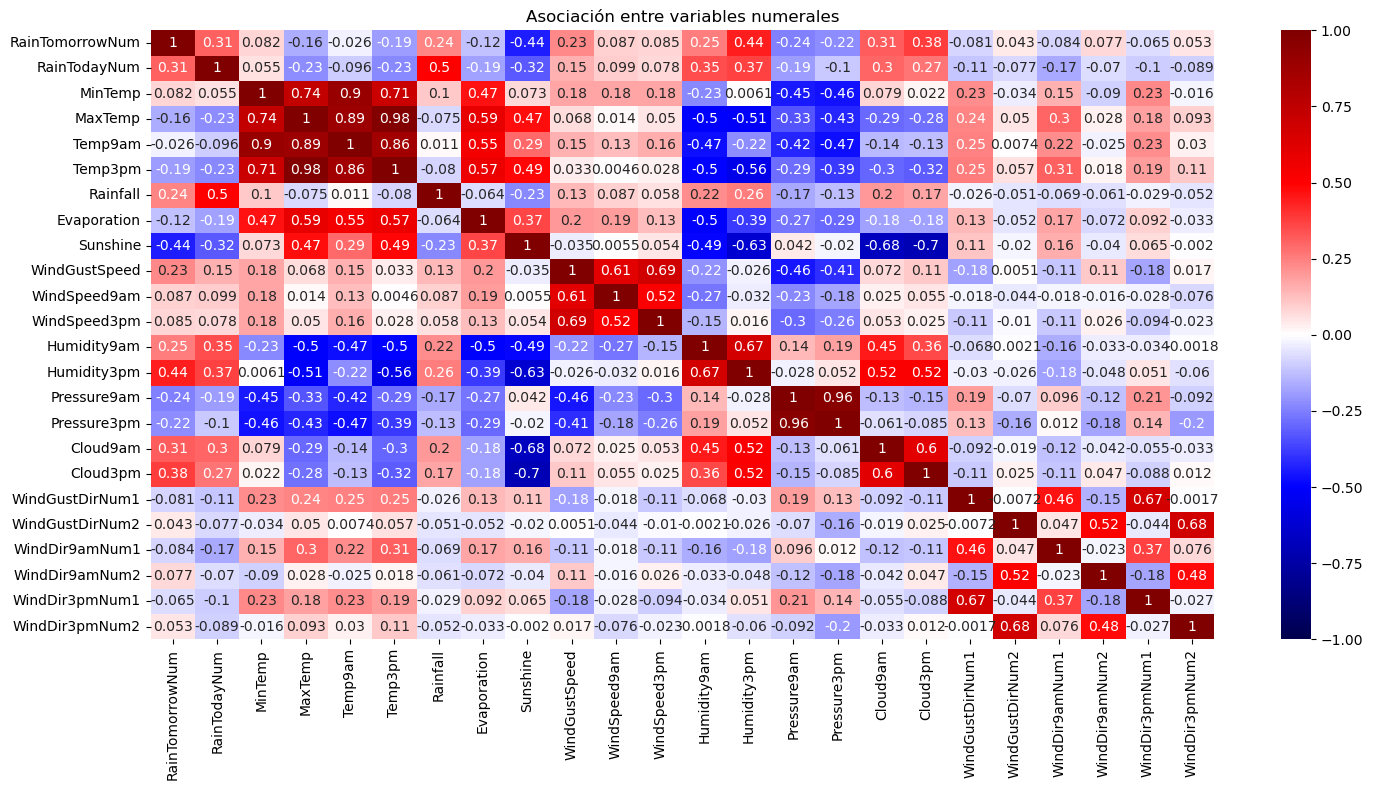

In [90]:
# Realizamos el mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="seismic", vmin=-1, center=0, vmax=1)
plt.title("Asociación entre variables numerales")
plt.tight_layout()
plt.show()

## Correlación de la presencia de valores ausentes

Veamos si la presencia o no de los valores ausentes en los atributos numéricos está realacionada con las ciudades. Para ello, crearemos una matriz de valores de Cramer entre los atributos categóricos y la presencia o no de "NA" en los atributos numéricos

In [91]:
# Dividimos la fecha en sus tres partes
fechas = df.Date
df["Year"]= fechas.map(lambda fecha: datetime.strptime(fecha, "%Y-%m-%d").year)
df["Month"]= fechas.map(lambda fecha: datetime.strptime(fecha, "%Y-%m-%d").month)
df["Day"]= fechas.map(lambda fecha: datetime.strptime(fecha, "%Y-%m-%d").day)

In [92]:
# Creamos df auxiliar con cuándo es nan o no
cat_cols = ["Location", "Year", "Month", "Day"] 

df_bool = pd.DataFrame({})


df_bool["Year"] = df["Year"]
df_bool["Month"] = df["Month"]
df_bool["Day"] = df["Day"]
df_bool["Location"] = df["Location"]
for atributo in num_atrib:
    df_bool[atributo+"bool"] = df[atributo].map(lambda x: pd.isna(x) )
    cat_cols.append(atributo+"bool")
df_bool["RainTomorrow"] = df["RainTomorrow"].map(lambda x: x=="Yes")


In [93]:
df_bool

Year  Month  Day Location  RainTomorrowNumbool  RainTodayNumbool  \
0       2008     12    1   Albury                False             False   
1       2008     12    2   Albury                False             False   
2       2008     12    3   Albury                False             False   
3       2008     12    4   Albury                False             False   
4       2008     12    5   Albury                False             False   
...      ...    ...  ...      ...                  ...               ...   
145455  2017      6   21    Uluru                False             False   
145456  2017      6   22    Uluru                False             False   
145457  2017      6   23    Uluru                False             False   
145458  2017      6   24    Uluru                False             False   
145459  2017      6   25    Uluru                False             False   

        MinTempbool  MaxTempbool  Temp9ambool  Temp3pmbool  ...  \
0             False        False        False        False  ...   
1             False        False        False        False  ...   
2             False        False        False        False  ...   
3             False        False        False        False  ...   
4             False        False        False        False  ...   
...             ...          ...          ...          ...  ...   
145455        False        False        False        False  ...   
145456        False        False        False        False  ...   
145457        False        False        False        False  ...   
145458        False        False        False        False  ...   
145459        False         True        False        False  ...   

        WindGustSpeedbool  WindSpeed9ambool  WindSpeed3pmbool  \
0                   False             False             False   
1                   False             False             False   
2                   False             False             False   
3                   False             False             False   
4                   False             False             False   
...                   ...               ...               ...   
145455              False             False             False   
145456              False             False             False   
145457              False             False             False   
145458              False             False             False   
145459               True             False             False   

        Humidity9ambool  Humidity3pmbool  Pressure9ambool  Pressure3pmbool  \
0                 False            False            False            False   
1                 False            False            False            False   
2                 False            False            False            False   
3                 False            False            False            False   
4                 False            False            False            False   
...                 ...              ...              ...              ...   
145455            False            False            False            False   
145456            False            False            False            False   
145457            False            False            False            False   
145458            False            False            False            False   
145459            False            False            False            False   

        Cloud9ambool  Cloud3pmbool  RainTomorrow  
0              False          True         False  
1               True          True         False  
2               True         False         False  
3               True          True         False  
4              False         False         False  
...              ...           ...           ...  
145455          True          True         False  
145456          True          True         False  
145457          True          True         False  
145458         False         False         False  
145459     

In [94]:
import numpy as np
from scipy.stats import chi2_contingency
#Definición de la V de Cramer

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))  # corrección de bias
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

Cremos Mtraiz de Cramer

In [95]:
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            v = cramers_v(df_bool[col1], df_bool[col2])
            cramer_matrix.loc[col1, col2] = round(v, 3)

print(cramer_matrix)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\1115312914.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\1115312914.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\1115312914.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\1115312914.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\1115312914.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Acer\AppData\Local\Temp\ipykernel_15764\1115312914.py:14: RuntimeW

                    Location   Year  Month    Day RainTomorrowNumbool  \
Location                 1.0  0.095    0.0    0.0                 NaN   
Year                   0.095    1.0  0.102    0.0                 NaN   
Month                    0.0  0.102    1.0  0.037                 NaN   
Day                      0.0    0.0  0.037    1.0                 NaN   
RainTomorrowNumbool      NaN    NaN    NaN    NaN                 1.0   
RainTodayNumbool         NaN    NaN    NaN    NaN                 NaN   
MinTempbool            0.269   0.06  0.022    0.0                 NaN   
MaxTempbool            0.262  0.068   0.02    0.0                 NaN   
Temp9ambool            0.277  0.045  0.024    0.0                 NaN   
Temp3pmbool            0.477  0.152  0.017    0.0                 NaN   
Rainfallbool           0.278  0.046  0.013  0.003                 NaN   
Evaporationbool        0.858  0.193  0.019    0.0                 NaN   
Sunshinebool           0.859  0.243  0.021    0.0  

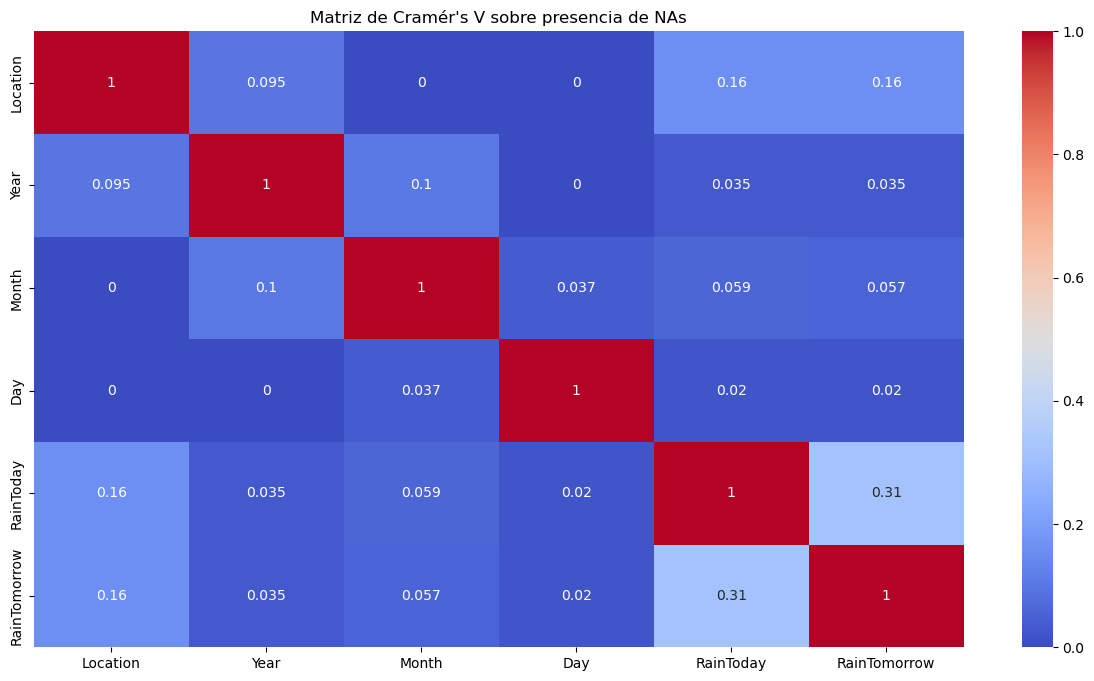

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de convertir los valores a tipo float (si es necesario)
cramer_matrix = cramer_matrix.astype(float)

# Tamaño del gráfico
plt.figure(figsize=(15, 8))

# Dibujar el heatmap
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)

# Título del gráfico
plt.title("Matriz de Cramér's V sobre presencia de NAs")

# Mostrar el gráfico
plt.show()


## Cramer's V de las variables categóricas con la clase

Aprovechamos para comparar las varaibles categóricas con la clase

In [97]:
# Creamos filas auxiliares que dicen cuándo es nan o no
cat_cols = ["Location", "Year", "Month","Day","RainToday","RainTomorrow"]
df_bool["RainToday"] = df["RainToday"]
df_bool["RainTomorrow"] = df["RainTomorrow"]
df_bool["Day"] = df["Day"]

In [98]:
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            v = cramers_v(df_bool[col1], df_bool[col2])
            cramer_matrix.loc[col1, col2] = round(v, 3)

print(cramer_matrix)

             Location   Year  Month    Day RainToday RainTomorrow
Location          1.0  0.095    0.0    0.0     0.157        0.157
Year            0.095    1.0  0.102    0.0     0.035        0.035
Month             0.0  0.102    1.0  0.037     0.059        0.057
Day               0.0    0.0  0.037    1.0      0.02         0.02
RainToday       0.157  0.035  0.059   0.02       1.0        0.313
RainTomorrow    0.157  0.035  0.057   0.02     0.313          1.0


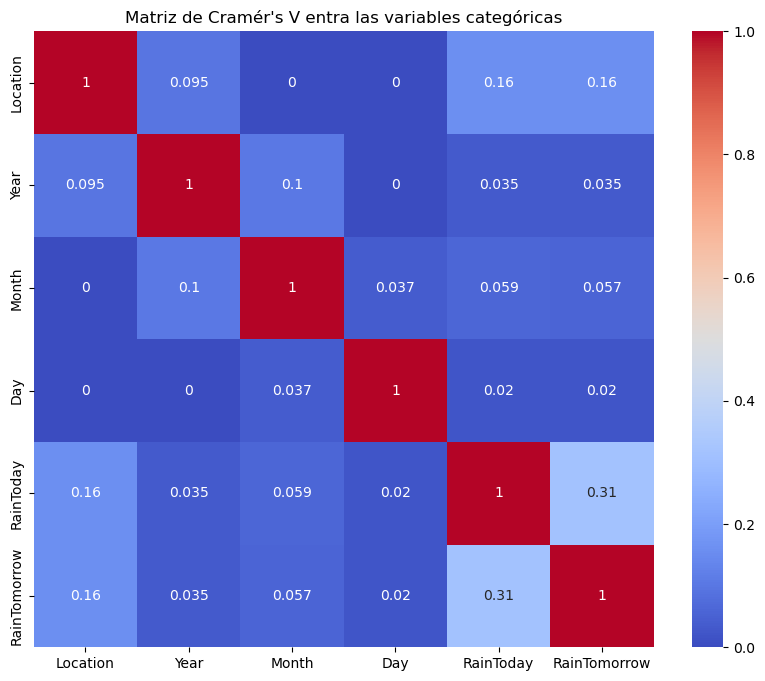

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de convertir los valores a tipo float (si es necesario)
cramer_matrix = cramer_matrix.astype(float)

# Tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el heatmap
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)

# Título del gráfico
plt.title("Matriz de Cramér's V entra las variables categóricas")

# Mostrar el gráfico
plt.show()


No hay ninguna que esté correlacionada con la clase, como mucho RainTomorrow pero Reinfall nos da más infomación